In [0]:
%matplotlib inline
import numpy as np
import tensorflow
import torch
import torchvision
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

In [0]:
img_transform = transforms.Compose([
    transforms.ToTensor(),
    #transforms.Normalize(mean=(0.5), std= (0.5)),
    transforms.Lambda(lambda x: torch.flatten(x))
])

EPOCHS = 20
BATCH_SIZE = 128
LEARNING_RATE = 0.001

In [0]:
train_dataset = MNIST('./data',
                      train = True,
                      transform = img_transform,
                      download = True)

train_dataloader = DataLoader(train_dataset,
                              batch_size = BATCH_SIZE,
                              shuffle = True,
                              num_workers = 2)

In [0]:
class perceptron(nn.Module):

  def __init__(self):

    super(perceptron,self).__init__()

    self.encoder = nn.Sequential(
    nn.Linear(in_features= 784,out_features= 256),
    nn.ReLU(inplace=True),
    nn.Dropout(p = 0.2),

    nn.Linear(in_features = 256, out_features = 128),
    nn.ReLU(inplace=True),
    nn.Dropout(p = 0.2),

    nn.Linear(in_features=128, out_features = 10)
    )

  def forward(self,x):

    pred = self.encoder(x)

    softmax_pred = F.softmax(pred)

    return softmax_pred



In [5]:
# Checking availability of GPU
use_gpu = torch.cuda.is_available()

use_gpu

True

In [0]:
model = perceptron().cuda()
cost = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = LEARNING_RATE, weight_decay=1e-5)

In [0]:
import time


def train_model(model,cost,dataloader,epochs,optimizer):

  train_loss = []

  for epoch in range(epochs):

    print('Epoch {}/{}'.format(epoch, epochs - 1))

    start = time.time()

    epoch_loss = 0

    batch = 0

    for data in dataloader:

      img, label = data

      if(len(label) != 128):

        continue

      labels = np.zeros((128,10))

      for i in range(0,128):

        labels[i,label[i]] = 1
      
      img = Variable(img).cuda()
      labels = Variable(torch.Tensor(labels)).cuda()

      # =================== forward =====================
      output = model(img)

      loss = cost(output,labels)
      # =================== backward ====================
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    train_loss.append(loss)

    time_elapsed = time.time() - start
    
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

  return train_loss






In [14]:
loss_history = train_model(model,cost,train_dataloader,EPOCHS,optimizer)

Epoch 0/19


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Training complete in 0m 8s
Epoch 1/19
Training complete in 0m 8s
Epoch 2/19
Training complete in 0m 8s
Epoch 3/19
Training complete in 0m 8s
Epoch 4/19
Training complete in 0m 8s
Epoch 5/19
Training complete in 0m 8s
Epoch 6/19
Training complete in 0m 8s
Epoch 7/19
Training complete in 0m 8s
Epoch 8/19
Training complete in 0m 8s
Epoch 9/19
Training complete in 0m 8s
Epoch 10/19
Training complete in 0m 8s
Epoch 11/19
Training complete in 0m 8s
Epoch 12/19
Training complete in 0m 8s
Epoch 13/19
Training complete in 0m 8s
Epoch 14/19
Training complete in 0m 8s
Epoch 15/19
Training complete in 0m 8s
Epoch 16/19
Training complete in 0m 8s
Epoch 17/19
Training complete in 0m 8s
Epoch 18/19
Training complete in 0m 8s
Epoch 19/19
Training complete in 0m 8s


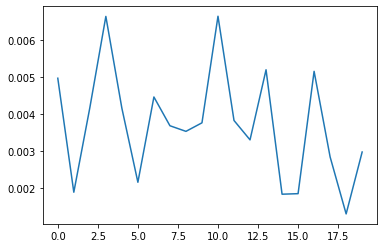

In [15]:
history = np.asarray(loss_history)
plt.plot(history)
plt.show()